Lesson2：感知机模型（Perceptron）

    感知机模型用来解决分类问题

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

对于一组二维的对象:

In [2]:
x1 = np.random.uniform(0,1,20)
diff1 = np.random.chisquare(2,20)
y1 = 2*x1 + 5 + diff1
df1 = pd.DataFrame((x1,y1),index = ['x1','x2']).T
df1['y'] = 1

x2 = np.random.uniform(0,1,20)
diff2 = np.random.chisquare(2,20)
y2 = 2*x2 + 5 - diff2
df2 = pd.DataFrame((x2,y2),index = ['x1','x2']).T
df2['y'] = -1

data = pd.concat([df1,df2],ignore_index = True)
data

,x1,x2,y
0,0.968487,7.407566,1
1,0.958163,7.594384,1
2,0.050720,6.812628,1
3,0.761004,7.040956,1
4,0.147402,6.289465,1
5,0.533786,8.782700,1
6,0.347799,6.574658,1
7,0.734882,6.856285,1
8,0.920678,7.229342,1
9,0.423708,8.330130,1


<function matplotlib.pyplot.show(close=None, block=None)>

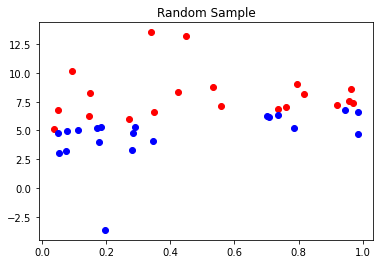

In [3]:
positive_x = data[['x1','x2']][data.y == 1]
negative_x = data[['x1','x2']][data.y != 1]
plt.scatter(positive_x['x1'] , positive_x['x2'] , color = 'r')
plt.scatter(negative_x['x1'] , negative_x['x2'] , color = 'b')
plt.title('Random Sample')
plt.show

目标是将两种点区分开

首先定义损失函数: 

In [4]:
def loss_function(data , ω , b):
    f = ( np.dot(data[['x1','x2']] , ω.T) + b ) * data['y']
    a = np.where(f <= 0)
    return f,a[0]

初始化迭代：

In [5]:
ω = np.zeros(data.shape[1]-1)
b = 0
f,a = loss_function(data , ω , b)
i = 1

开始迭代：

随机梯度下降法

In [6]:
while f[a].size != 0 :
    tick = np.random.randint((f[a].shape[0]))
    
    x = data[['x1','x2']].iloc[a[tick]]
    y = data.y.iloc[a[tick]]
    ω = ω + y*x
    b = b + y
    
    f,a = loss_function(data , ω , b)

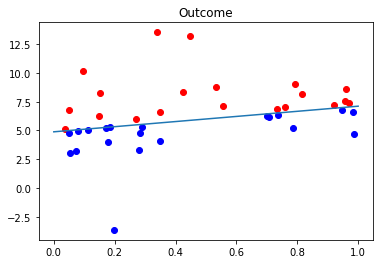

In [7]:
x1 = np.linspace(0,1)
x2 = - ( ω[0] * x1 + b ) / ω[1]
plt.plot(x1 , x2)
positive_x = data[['x1','x2']][data.y == 1]
negative_x = data[['x1','x2']][data.y != 1]
plt.scatter(positive_x['x1'] , positive_x['x2'] , color = 'r')
plt.scatter(negative_x['x1'] , negative_x['x2'] , color = 'b')
plt.title('Outcome')
plt.show()

最后还有些疑问：

1）数据是用一阶线性函数生成，所以有明显分界线。如果用幂函数等生成，数据点可能混杂在一起，这个模型还能完成区分吗？

当数据混杂在一起的时候，感知机模型不能完成分类。因为感知机模型只能用简单线性函数进行分类。

2）最后生成的 w 是什么的系数，分界线的表达式是怎么来的？